The current process suffers from the following problems:

The company is under a time crunch to test the compressive strength of the concrete to release in the market.
Previously they were using manual methods to test the compressive strength of the concrete which is very time-consuming and inefficient.

The company has hired you as data science consultants. They want to automate the process of predicting the compressive strength of the concrete, based on the materials used.


Project Deliverables
Deliverable: Predict the compressive strength of concrete.
Machine Learning Task: Regression
Target Variable: csMPa
Win Condition: N/A (best possible model)

The dataset contains materials used in making the concrete.

The column csMPa is the compressive strength of concrete.

This is the data that we have to predict the compressive strength.


The dataset is divided into two parts: Train and Test sets.

Train Set:
The train set contains 824 rows and 10 columns.
The last column csMPa is the target variable.

Test Set:
The test set contains 206 rows and 9 columns.
The test set doesn’t contain the csMPa column.
It needs to be predicted for the test set.


Dataset Feature Description
The Dataset contains the following columns:

Column Name	Description
Id	Unique identity of each observation.
cement	Quantity of cement in the mixture in kg(kilogram).
slag	Quantity of cement in the mixture in kg(kilogram).
Flyash	Quantity of fly ash in the mixture in kg(kilogram).
water	Quantity of water in the mixture in kg(kilogram).
superplasticizer	Quantity of superplasticizer in the mixture in kg(kilogram).
coarseaggregate	Quantity of coarse aggregate in the mixture in kg(kilogram).
fineaggregate	Quantity of fine aggregate in the mixture in kg(kilogram).
age	Age of the mixture in days.
csMPa	compressive strength of concrete in MPa(dependent variable).

In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Importing Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
import plotly.graph_objects as go                                   # Importing to make interactive plots                    
from plotly.subplots import make_subplots                           # Importing to create subplots in plotly
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # Importing to scale the features
from sklearn.model_selection import train_test_split                # Importing to split the data into train and test data
from sklearn.neighbors import KNeighborsClassifier                  # To instantiate a KNN Classifier
from sklearn.linear_model import LogisticRegression                 # To instantiate a Logistic Regression Classifier
from sklearn.ensemble import RandomForestClassifier                 # To instantiate a Random Forest Classifier
from sklearn.naive_bayes import GaussianNB                          # To instantiate a Naive Bayes Classifier
from sklearn.metrics import accuracy_score                          # To calculate the accuracy of classifiers
from sklearn.model_selection import KFold                           # To create k folds for cross validation
from sklearn.model_selection import cross_validate                  # To calculate cross validation scores
from sklearn.model_selection import GridSearchCV                    # To tune the models
#-------------------------------------------------------------------------------------------------------------------------------
import time                                                         # Importing to calculate time
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [2]:
concrete=pd.read_csv('concrete_train.csv')


In [3]:
concrete.describe()

,Id,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,824.00000,824.00000,824.00000,824.00000,824.00000,824.00000,824.00000,824.00000,824.00000,824.00000
mean,513.84709,283.36080,74.37160,53.16080,181.79709,6.16396,973.54854,772.10740,44.66141,35.85786
std,296.78678,107.53640,86.97778,64.00065,21.32190,5.96726,78.69463,80.98472,60.47570,16.86510
min,0.00000,102.00000,0.00000,0.00000,121.80000,0.00000,801.00000,594.00000,1.00000,2.33000
25%,251.75000,192.00000,0.00000,0.00000,164.90000,0.00000,932.00000,726.77500,12.25000,23.68500
50%,513.50000,275.10000,22.00000,0.00000,185.35000,6.10000,968.00000,778.50000,28.00000,34.08000
75%,770.25000,359.90000,144.77500,118.30000,192.00000,10.12500,1040.60000,821.25000,56.00000,45.86250
max,1028.00000,540.00000,359.40000,195.00000,247.00000,32.20000,1145.00000,992.60000,365.00000,82.60000


In [4]:
concrete.head()

,Id,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,995,158.60000,148.90000,116.00000,175.10000,15.00000,953.30000,719.70000,28,27.68000
1,507,424.00000,22.00000,132.00000,178.00000,8.50000,822.00000,750.00000,28,62.05000
2,334,275.10000,0.00000,121.40000,159.50000,9.90000,1053.60000,777.50000,3,23.80000
3,848,252.00000,97.00000,76.00000,194.00000,8.00000,835.00000,821.00000,28,33.40000
4,294,168.90000,42.20000,124.30000,158.30000,10.80000,1080.80000,796.20000,3,7.40000


In [5]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                824 non-null    int64  
 1   cement            824 non-null    float64
 2   slag              824 non-null    float64
 3   flyash            824 non-null    float64
 4   water             824 non-null    float64
 5   superplasticizer  824 non-null    float64
 6   coarseaggregate   824 non-null    float64
 7   fineaggregate     824 non-null    float64
 8   age               824 non-null    int64  
 9   csMPa             824 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 64.5 KB


In [72]:
profile = ProfileReport(df=concrete)
profile.to_file(output_file='Pre Profiling Report_concrete.html')
print('Accomplished!')


Accomplished!


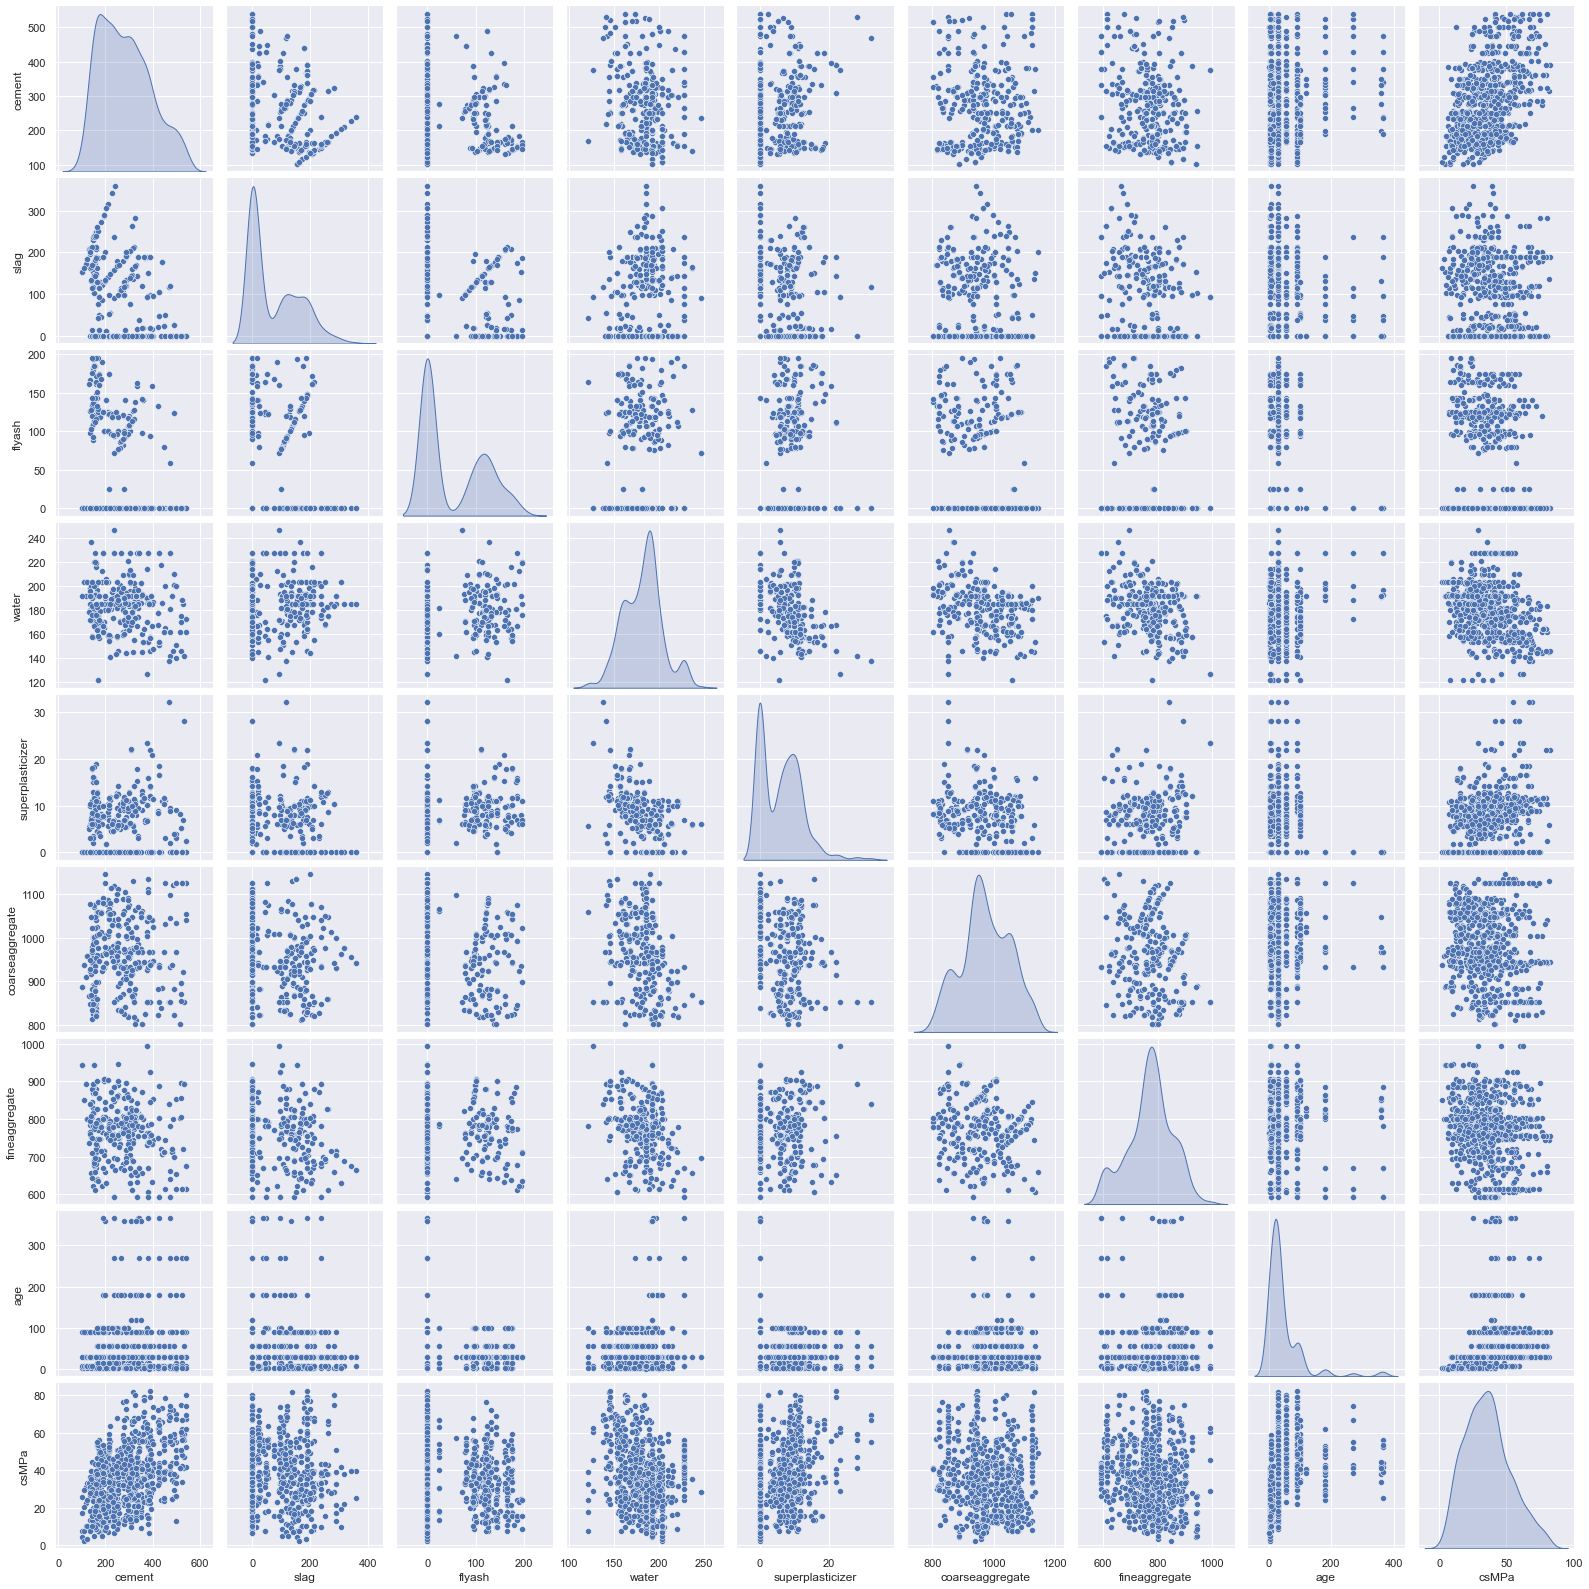

In [80]:
sns.pairplot(concrete,diag_kind='kde')

<AxesSubplot:xlabel='age', ylabel='Density'>

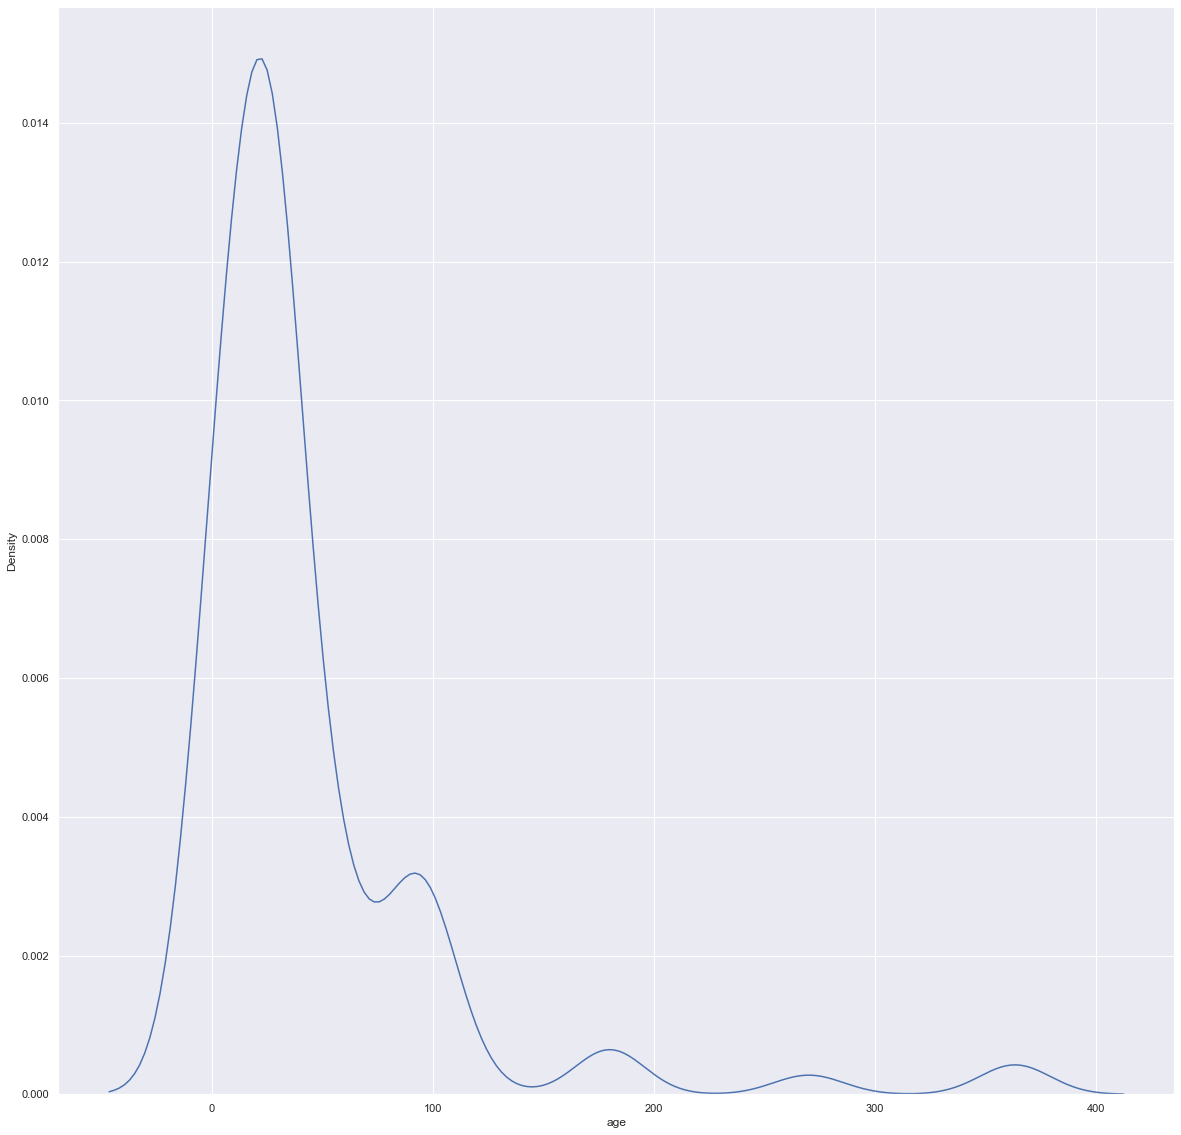

In [81]:
sns.kdeplot(concrete['age'],x='age')

<AxesSubplot:xlabel='age'>

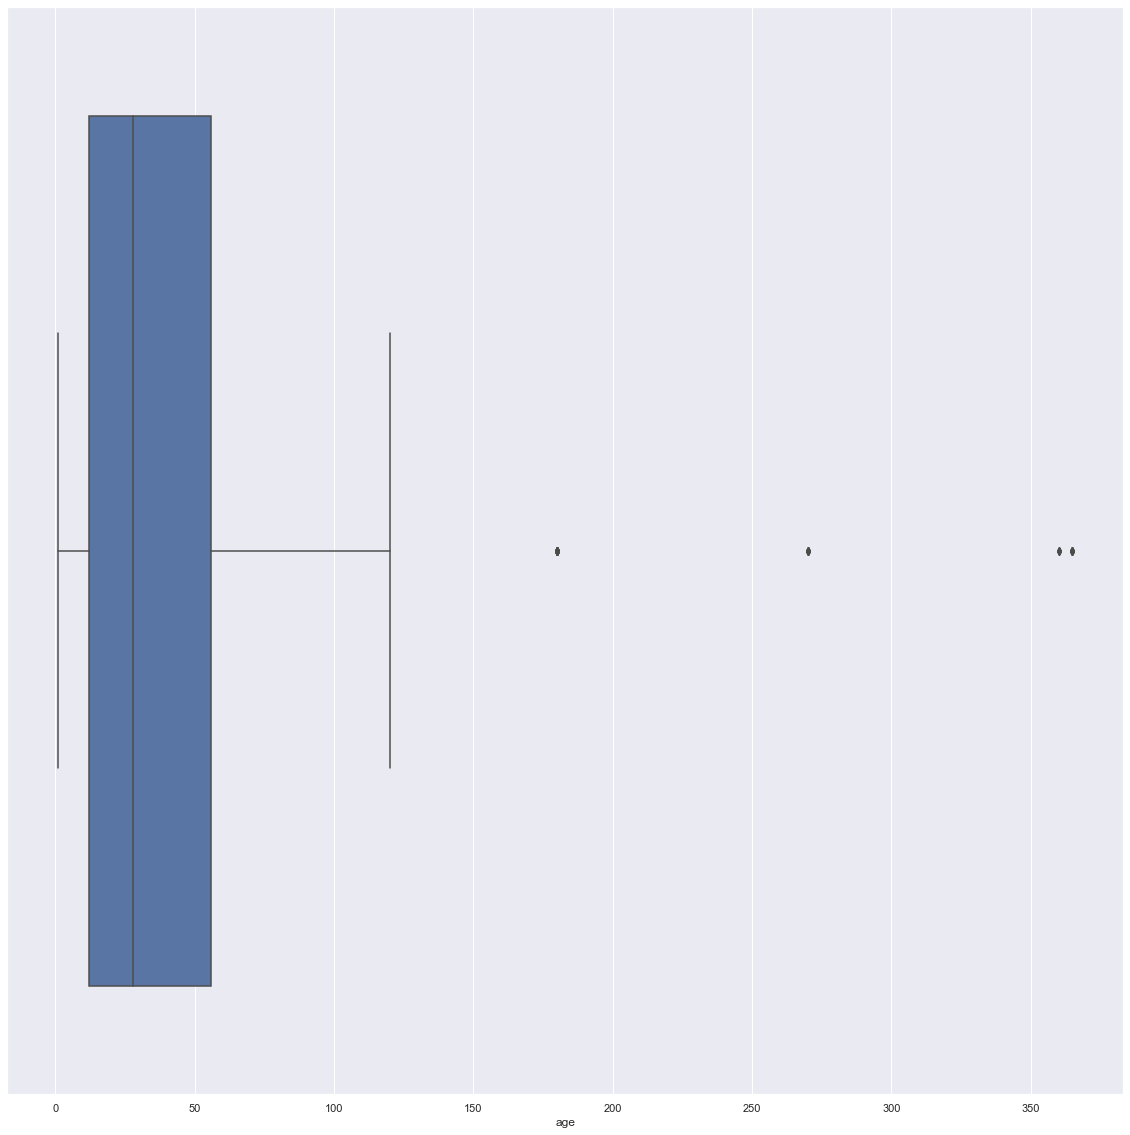

In [152]:
sns.boxplot(concrete['age'])

<AxesSubplot:xlabel='age', ylabel='Count'>

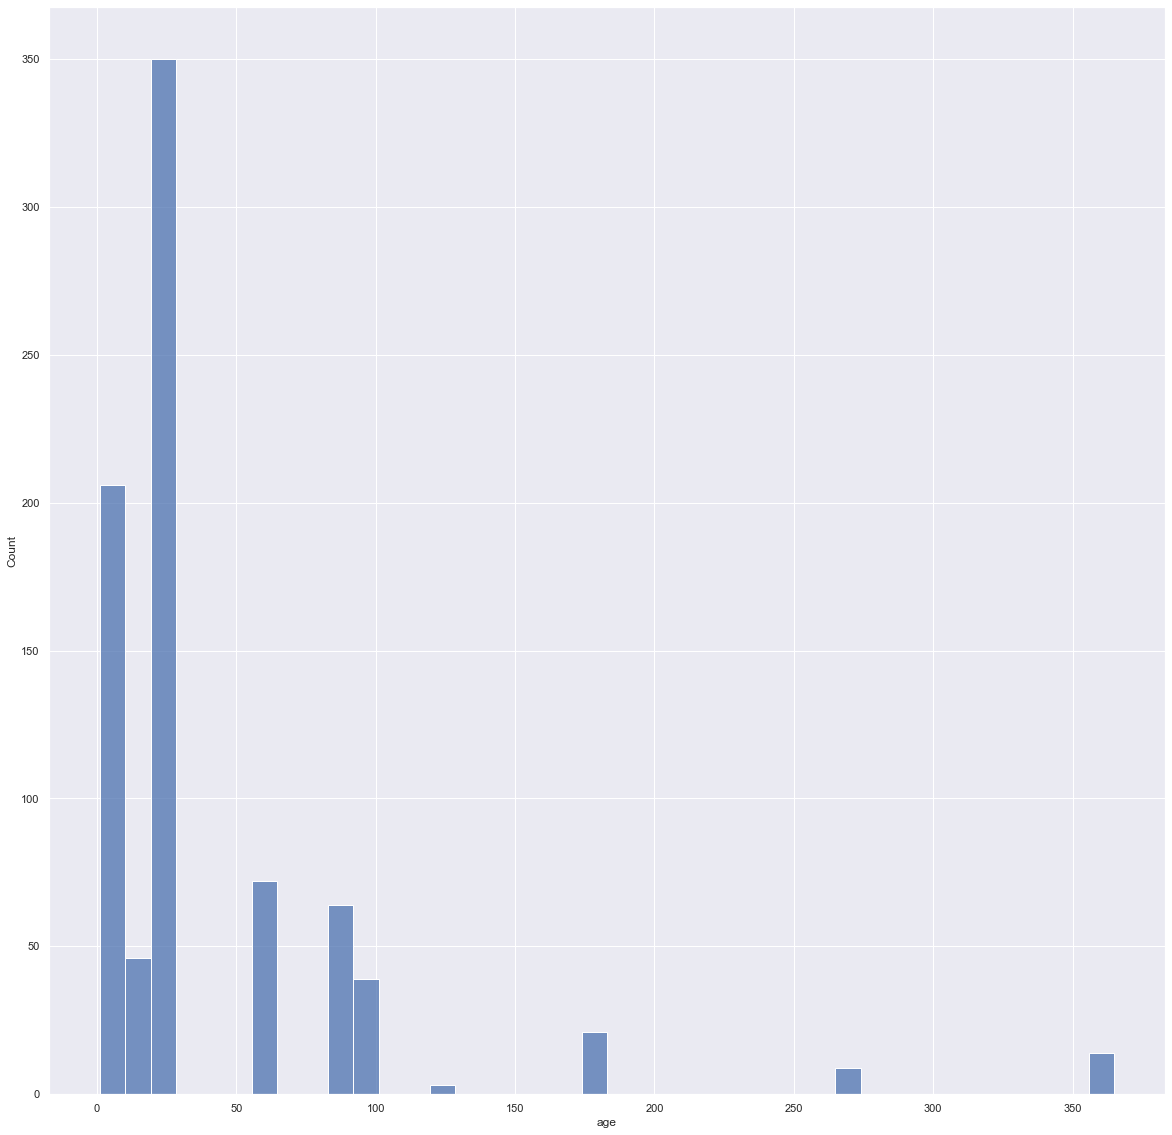

In [82]:
sns.histplot(concrete['age'])

In [150]:
concrete['age'].value_counts()

28     350
3      110
7       94
56      72
14      46
90      44
100     39
180     21
91      20
270      9
365      9
360      5
120      3
1        2
Name: age, dtype: int64

In [6]:
concrete.drop(['Id'],axis=1,inplace=True)

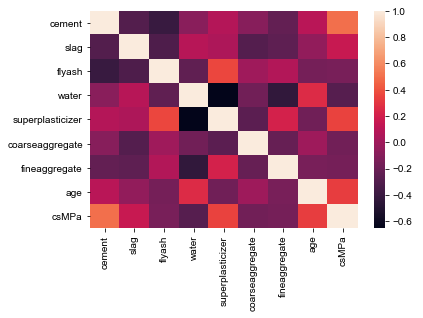

In [7]:
sns.heatmap(concrete.corr(),)
sns.set(rc={'figure.figsize':(20,20)})

In [123]:
concrete.corr()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.00000,-0.29244,-0.40828,-0.07957,0.07714,-0.08907,-0.22887,0.09760,0.49669
slag,-0.29244,1.00000,-0.31581,0.09149,0.05544,-0.28773,-0.25190,-0.05161,0.15516
flyash,-0.40828,-0.31581,1.00000,-0.24665,0.36580,0.00060,0.06995,-0.15682,-0.14975
water,-0.07957,0.09149,-0.24665,1.00000,-0.65378,-0.16977,-0.43456,0.26054,-0.28459
superplasticizer,0.07714,0.05544,0.36580,-0.65378,1.00000,-0.26303,0.21767,-0.18028,0.35329
coarseaggregate,-0.08907,-0.28773,0.00060,-0.16977,-0.26303,1.00000,-0.21662,-0.00382,-0.17161
fineaggregate,-0.22887,-0.25190,0.06995,-0.43456,0.21767,-0.21662,1.00000,-0.14727,-0.15842
age,0.09760,-0.05161,-0.15682,0.26054,-0.18028,-0.00382,-0.14727,1.00000,0.33207
csMPa,0.49669,0.15516,-0.14975,-0.28459,0.35329,-0.17161,-0.15842,0.33207,1.00000


In [ ]:
#NO feature shows strong correlation hence all the features are considered for regression

In [139]:

Y=concrete['csMPa']
concrete_final=pd.DataFrame(concrete)
concrete_final.drop(['csMPa'],axis=1,inplace=True)
X=concrete_final

In [ ]:
sns.pairplot(X,diag_kind='kde')

In [140]:
#start with linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lg=LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


In [141]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X=concrete_final
pt.fit(X_train)
X_train=pt.transform(X_train)
X_test=pt.transform(X_test)
X_test

array([[-1.1066551 ,  0.4120988 ,  1.21184484, ...,  1.07128021,
         0.10702442, -1.69258582],
       [ 1.91584718, -1.08996183, -0.90368575, ..., -1.54704606,
         1.58733169,  0.07799108],
       [ 0.67986639, -1.08996183, -0.90368575, ..., -0.09488146,
         0.11827269,  0.07799108],
       ...,
       [-0.51354594, -1.08996183,  1.23015446, ...,  1.00375238,
         0.06086357, -1.69258582],
       [ 1.74442305, -1.08996183, -0.90368575, ...,  1.93913419,
        -1.84205097, -1.08672182],
       [-0.80186534, -1.08996183,  1.13381277, ...,  1.33565721,
         0.34360376, -0.52465508]])

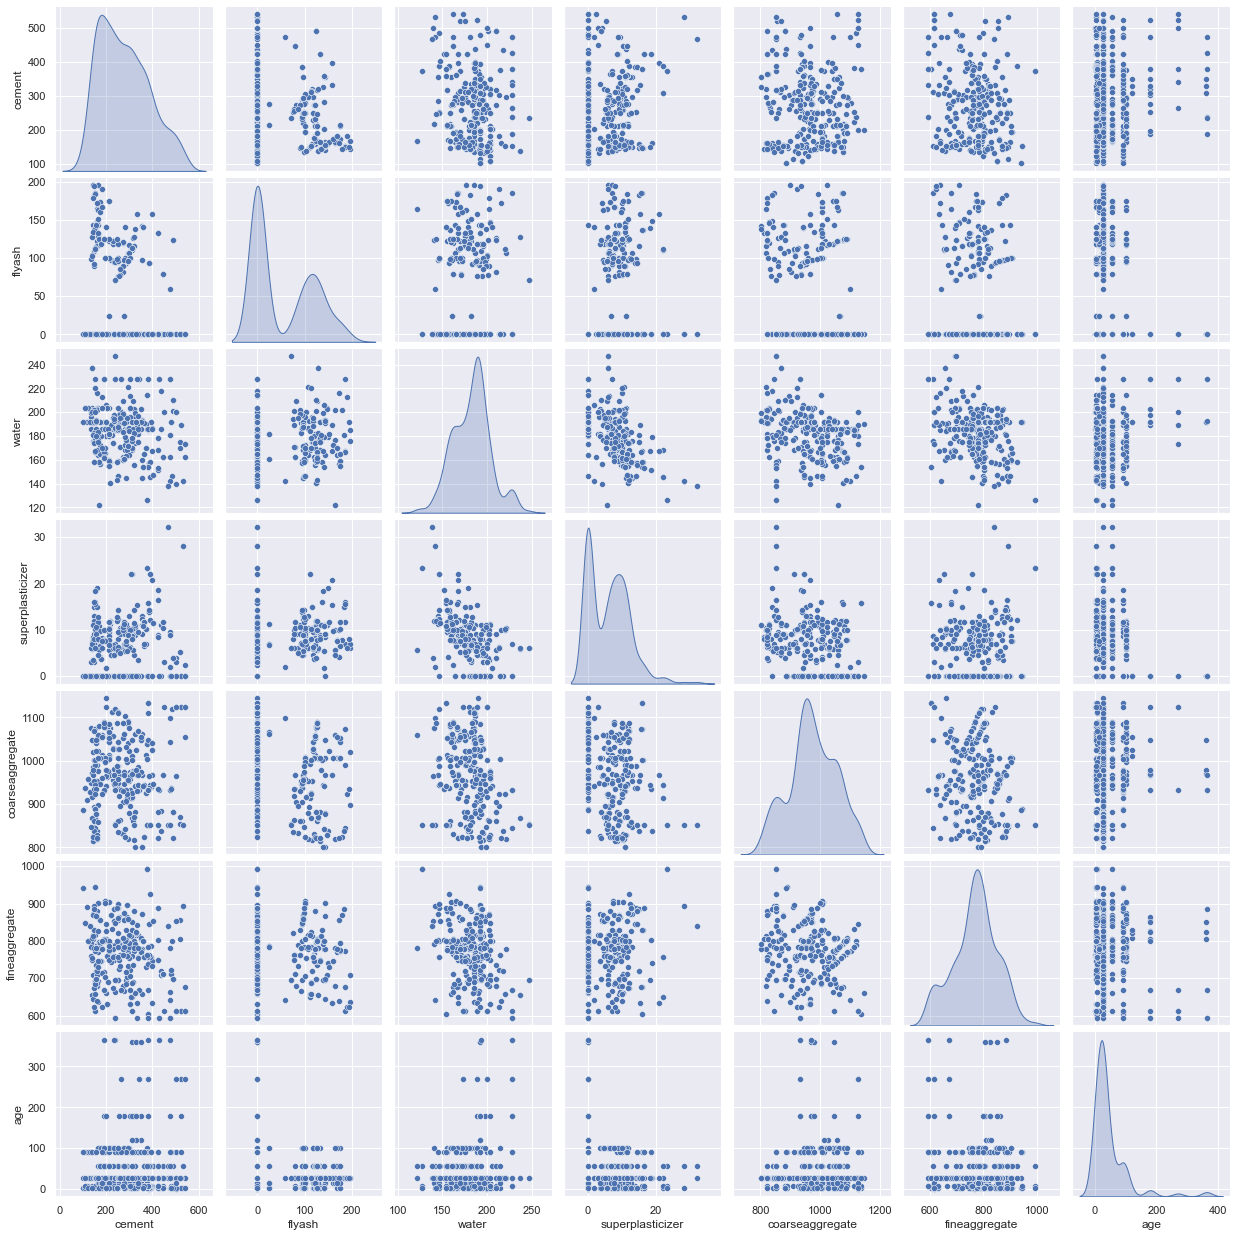

In [87]:
sns.pairplot(X_train,diag_kind='kde')

In [ ]:
sns.pairplot(X_test,diag_kind='kde')

In [142]:
lg.fit(X_train,y_train)
y_predict=lg.predict(X_test)

In [168]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
r2_score(y_test,y_predict)
rmse=np.sqrt(mean_squared_error(y_test,y_predict))
print('root mean squared error is ',rmse)

root mean squared error is  5.1165428535697925


In [144]:
#implementing kfold for linear regression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
kf= KFold(n_splits=5)
kfold_score = cross_val_score(lg,X_test,y_test,cv=kf)


In [145]:
print("The cross validation scores of k-fold method with 5 folds is",kfold_score)

The cross validation scores of k-fold method with 5 folds is [0.81195445 0.74962916 0.7703804  0.79697766 0.63522468]


In [169]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train,y_train)
y_predict_dt=regressor.predict(X_test)
print(r2_score(y_test,y_predict_dt))
print(regressor.score(X_test,y_test))
rmse=np.sqrt(mean_squared_error(y_test,y_predict_dt))
print('root mean squared error is ',rmse)

0.8563314078473798
0.8563314078473798
root mean squared error is  6.584276230100367


In [147]:
#implementing kfold for decision treee regressor
kfold_scoredt=cross_val_score(regressor,X,Y,cv=kf)
print("The cross validation scores of k-fold method with 5 folds is",kfold_scoredt)

The cross validation scores of k-fold method with 5 folds is [0.82257678 0.81966556 0.83177206 0.79800406 0.80571247]


In [170]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor( random_state=42)
regr.fit(X_train,y_train)
y_pred=regr.predict(X_test)
X_test
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('root mean squared error is ',rmse)

root mean squared error is  5.488073164410919


In [149]:
r2_score(y_test,y_pred)

0.9001873615188312

In [150]:
print(regr.score(X_test,y_test))

0.9001873615188312


In [151]:
kfold_scorerf=cross_val_score(regr,X_test,y_test,cv=kf)
print("The cross validation scores of k-fold method with 5 folds is",kfold_scorerf)

The cross validation scores of k-fold method with 5 folds is [0.86903747 0.8584816  0.79914575 0.80089164 0.73796065]


In [91]:
#since the linear regression with ordinary least square method hasnt give a good accuracy ,trying to build a model with gradient descent

In [152]:
from sklearn.ensemble import GradientBoostingRegressor

In [171]:
sgdreg= GradientBoostingRegressor(n_estimators=1000)
sgdreg.fit(X_train,y_train)
y_predict_sgdreg=sgdreg.predict(X_test)
print('test score is',sgdreg.score(X_test,y_test))
print('train score',sgdreg.score(X_train,y_train))
rmse=np.sqrt(mean_squared_error(y_test,y_predict_sgdreg))
print('root mean squared error is ',rmse)

test score is 0.9112849054372928
train score 0.9929826651253337
root mean squared error is  5.173993567325251


In [157]:
kfold_score_GBR=cross_val_score(sgdreg,X_train,y_train,cv=10)
print("training score",np.mean(kfold_score_GBR))

kfold_score_GBR=cross_val_score(sgdreg,X_test,y_test,cv=10)
print("testing score",np.mean(kfold_score_GBR))
    

training score 0.9033708886004668
testing score 0.8633063250425149


In [172]:
from sklearn.neighbors import KNeighborsRegressor


model = KNeighborsRegressor()
# fit the model
model.fit(X_test, y_test)
y_pred_Knr=model.predict(X_test)
model.score(X_test,y_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred_Knr))
print('root mean squared error is ',rmse)

root mean squared error is  6.289363100178137


In [159]:
#to improve the accuracy getting important features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            824 non-null    float64
 1   slag              824 non-null    float64
 2   flyash            824 non-null    float64
 3   water             824 non-null    float64
 4   superplasticizer  824 non-null    float64
 5   coarseaggregate   824 non-null    float64
 6   fineaggregate     824 non-null    float64
 7   age               824 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 51.6 KB
[ 76.40964024  33.09750581  24.3310248   48.64797839  40.85244279
  20.66607981  27.81000802 141.37294722]
Feature: 0, Score: 76.40964
Feature: 1, Score: 33.09751
Feature: 2, Score: 24.33102
Feature: 3, Score: 48.64798
Feature: 4, Score: 40.85244
Feature: 5, Score: 20.66608
Feature: 6, Score: 27.81001
Feature: 7, Score: 141.37295


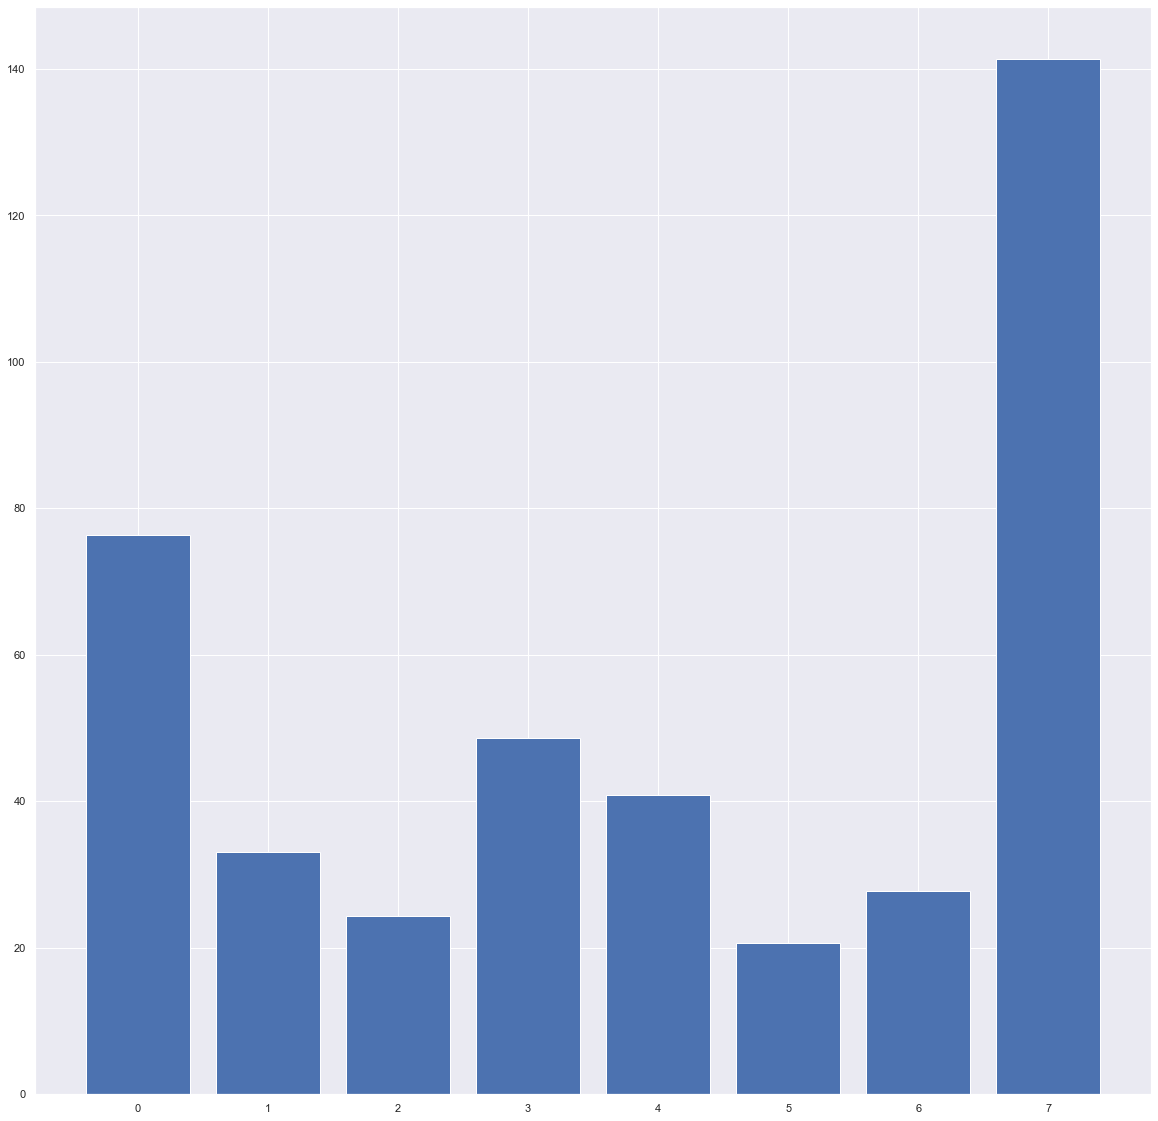

In [160]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(X_test, y_test)
# perform permutation importance
results = permutation_importance(model, X_test, y_test, scoring='neg_mean_squared_error')
X.info()
importance = results.importances_mean
print(importance)
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            824 non-null    float64
 1   slag              824 non-null    float64
 2   flyash            824 non-null    float64
 3   water             824 non-null    float64
 4   superplasticizer  824 non-null    float64
 5   coarseaggregate   824 non-null    float64
 6   fineaggregate     824 non-null    float64
 7   age               824 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 51.6 KB
[167.89505445  35.89265704   1.31423502  75.43979706  12.18628407
   6.84683755  16.25662262 208.18390125]
Feature: 0, Score: 167.89505
Feature: 1, Score: 35.89266
Feature: 2, Score: 1.31424
Feature: 3, Score: 75.43980
Feature: 4, Score: 12.18628
Feature: 5, Score: 6.84684
Feature: 6, Score: 16.25662
Feature: 7, Score: 208.18390


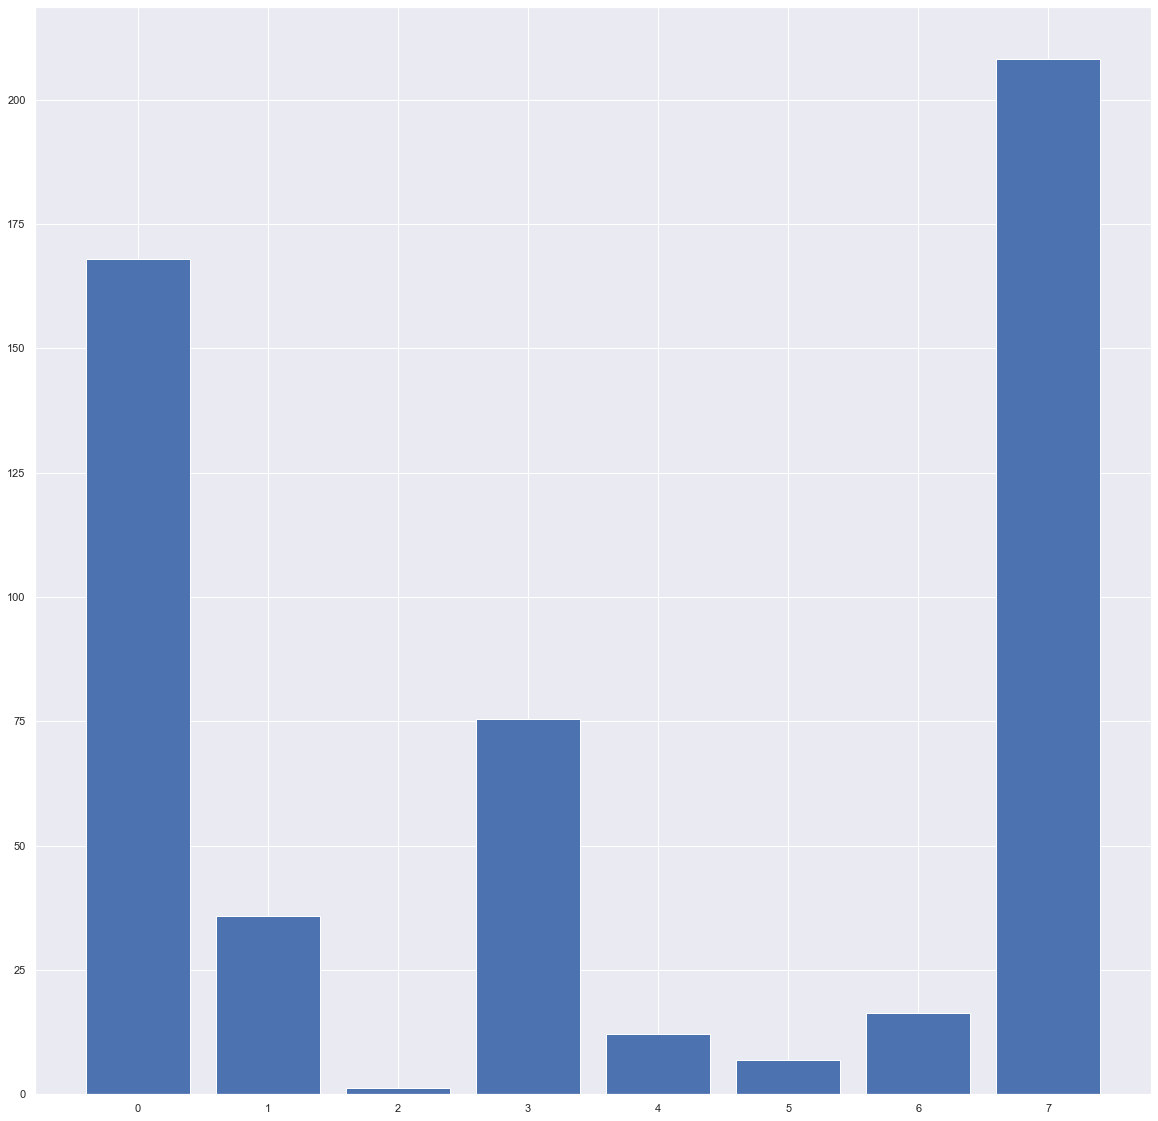

In [161]:

from sklearn.inspection import permutation_importance
from matplotlib import pyplot

#using gradient boosting model for feature importance
results = permutation_importance(sgdreg, X_test, y_test, scoring='neg_mean_squared_error')
X.info()
importance = results.importances_mean
print(importance)
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [162]:
concrete_t=pd.read_csv('concrete_test.csv')
concrete_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                206 non-null    int64  
 1   cement            206 non-null    float64
 2   slag              206 non-null    float64
 3   flyash            206 non-null    float64
 4   water             206 non-null    float64
 5   superplasticizer  206 non-null    float64
 6   coarseaggregate   206 non-null    float64
 7   fineaggregate     206 non-null    float64
 8   age               206 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 14.6 KB


In [163]:
#based on accuracy with different models ,it is observed that gradient boosting model is aiving more acccuracy than other models
#Gradien boosting model is selected for the test data

In [164]:
from sklearn.ensemble import GradientBoostingRegressor

feature_insaid = ['cement','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate','age']                # create a Python list of feature names
concrete_t[feature_insaid] 
concrete_t.info()
X_insaid=concrete_t[feature_insaid] 
X_in=pd.DataFrame(pt.transform(X_insaid),columns=feature_insaid)
X_in['y_insaid']=sgdreg.predict(X_in)
X_in['Id']=concrete_t['Id']
X_in.drop(feature_insaid,axis=1)

X_in= X_in.reindex(columns=['Id','y_insaid'])

X_in
X_in.to_csv('submission_concrete.csv', index=False, header=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                206 non-null    int64  
 1   cement            206 non-null    float64
 2   slag              206 non-null    float64
 3   flyash            206 non-null    float64
 4   water             206 non-null    float64
 5   superplasticizer  206 non-null    float64
 6   coarseaggregate   206 non-null    float64
 7   fineaggregate     206 non-null    float64
 8   age               206 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 14.6 KB
